In [631]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [632]:
data = pd.read_excel('/content/drive/MyDrive/corizo_projects/Flight ticket price predictor/Data_Train.xlsx')
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 25 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


###**METADATA**

In [633]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [634]:
# Display the number of rows and columns in the DataFrame
num_rows, num_columns = data.shape
print(f"Number of Rows: {num_rows}\nNumber of Columns: {num_columns}")
print("\n")

# Display count of the number of non-null values for each column
print("\nNumber of non-null values for each column :\n", data.count())

# Display basic statistical summary of the data
print("\nStatistical summary of data :\n", data.describe())
dataa = data.describe()

# Mean and Median for the 'Price' column
print("\nMean value of 'Price' column :\n", dataa.loc['mean']['Price']) #dataa['Price']['mean']
print("\nMedian value of 'Price' column :\n", dataa.loc['50%']['Price'])

Number of Rows: 10683
Number of Columns: 11



Number of non-null values for each column :
 Airline            10683
Date_of_Journey    10683
Source             10683
Destination        10683
Route              10682
Dep_Time           10683
Arrival_Time       10683
Duration           10683
Total_Stops        10682
Additional_Info    10683
Price              10683
dtype: int64

Statistical summary of data :
               Price
count  10683.000000
mean    9087.064121
std     4611.359167
min     1759.000000
25%     5277.000000
50%     8372.000000
75%    12373.000000
max    79512.000000

Mean value of 'Price' column :
 9087.064120565385

Median value of 'Price' column :
 8372.0


#**DATA CLEANSING**

In [635]:
data.isna().sum()  #returns true for 'NaN'
#data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [636]:
#drilling to the NaN values
data[data['Route'].isna() | data['Total_Stops'].isna()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


>> Since there is only one row with NaN values, instead of omitting the values, we shall delete the row, as it won't make much of a difference.


In [637]:
data.dropna(inplace = True)  #inplace value makes the change permanant
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [638]:
#data['Additional_Info'].unique().size
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 25 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


---
#**Exploratory Data Analysis(EDA) and Feature Engineering**
>*Pre-processing the entire dataset in order to feed the data into the ML Model*

###**1. Duration**
###**2. Departure and Arrival Time**
###**3. Date of Journey**
###**4. Total stops**
###**5. Additional info**
###**6. Airline**
###**7. Source and Destination**
###**8. Route**

---

##**1. DURATION**
Standardizing duration for all datasets into 'Minutes'

In [639]:
def convert_duration(duration):
  parts = duration.split()
  if len(parts) == 2:
    return int(parts[0].rstrip('h')) * 60 + int(parts[1].rstrip('m'))
  elif 'h' in duration:
       return int(duration.rstrip('h')) * 60
  else:
       return int(duration.rstrip('m'))

'''
def convert_duration(duration):
    if len(duration.split(' '))  == 2:
        hours = int(duration.split()[0][: -1])
        minutes = int(duration.split()[1][: -1])
        return hours * 60 + minutes
    else:
        return int(duration[: -1]) * 60
'''; #semicolon to not give output for this cell

In [640]:
data['Duration'] = data['Duration'].apply(convert_duration)
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 25 Mar,170,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,No info,13302


##**2. DEPARTURE AND ARRIVAL TIME**
Standardizing departure time and arrival time for all datasets into 'Hours' and 'Minutes' by creating separate columns for each

In [641]:
#Overriding Dep_Time and Arrival_Time type (from object to datetime64)
data['Dep_Time'] = pd.to_datetime(data['Dep_Time'])
data['Arrival_Time'] = pd.to_datetime(data['Arrival_Time'])
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,2023-12-21 22:20:00,2023-03-25 01:10:00,170,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-12-21 05:50:00,2023-12-21 13:15:00,445,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,2023-12-21 09:25:00,2023-06-10 04:25:00,1140,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,2023-12-21 18:05:00,2023-12-21 23:30:00,325,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,2023-12-21 16:50:00,2023-12-21 21:35:00,285,1 stop,No info,13302


In [642]:
#Accessing the hour and minute components
data['Dep_Time_in_hours'] = data['Dep_Time'].dt.hour
data['Dep_Time_in_minutes'] = data['Dep_Time'].dt.minute
data['Arrival_Time_in_hours'] = data['Arrival_Time'].dt.hour
data['Arrival_Time_in_minutes'] = data['Arrival_Time'].dt.minute

data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,2023-12-21 22:20:00,2023-03-25 01:10:00,170,non-stop,No info,3897,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-12-21 05:50:00,2023-12-21 13:15:00,445,2 stops,No info,7662,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,2023-12-21 09:25:00,2023-06-10 04:25:00,1140,2 stops,No info,13882,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,2023-12-21 18:05:00,2023-12-21 23:30:00,325,1 stop,No info,6218,18,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,2023-12-21 16:50:00,2023-12-21 21:35:00,285,1 stop,No info,13302,16,50,21,35


In [643]:
#Dropping the old arrival time and departure time as we don't need them anymore
data.drop(['Arrival_Time', 'Dep_Time'], axis=1, inplace=True)
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,18,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,16,50,21,35


##**3. DATE OF JOURNEY**
Since all data is from the year 2019, to avoid redundancy we extract only the day and the month values

In [644]:
#Overriding Date_of_Journey type (from object to datetime64)
#data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'], errors='coerce')
data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'])
#data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'], format='%d/%m/%Y')
data.head()

<ipython-input-644-90b9f26b7999>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'])


,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,25,4,25
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,18,5,23,30
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,16,50,21,35


In [645]:
data['Date_of_Journey'].dt.year.unique() #displays only 2019 since the entire dataset is from the year 2019.

array([2019])

In [646]:
data['Day_of_Journey'] = data['Date_of_Journey'].dt.day
data['Month_of_Journey'] = data['Date_of_Journey'].dt.month
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes,Day_of_Journey,Month_of_Journey
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,22,20,1,10,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,5,50,13,15,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,25,4,25,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,18,5,23,30,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,16,50,21,35,3,1


In [647]:
data.drop(['Date_of_Journey'], axis=1, inplace=True)
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes,Day_of_Journey,Month_of_Journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,22,20,1,10,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,5,50,13,15,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,25,4,25,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,18,5,23,30,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,16,50,21,35,3,1


##**4. TOTAL STOPS**
Converting total stops to numerical values

In [648]:
print(data['Total_Stops'].value_counts())

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64


In [649]:
#Overriding total stops datatype from object to int
data['Total_Stops'] = data['Total_Stops'].map({
    'non-stop': 0,
    '1 stop': 1,
    '2 stops': 2,
    '3 stops': 3,
    '4 stops': 4
})
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes,Day_of_Journey,Month_of_Journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,0,No info,3897,22,20,1,10,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,No info,7662,5,50,13,15,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,No info,13882,9,25,4,25,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1,No info,6218,18,5,23,30,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1,No info,13302,16,50,21,35,3,1


##**5. ADDITIONAL INFO**
Observe that this column does no necessarily provide useful predictive data for the target data. Thus, we drop it.

In case it DID provide useful predictive data we could've given each type a numerical value and evaluated it.

In [650]:
data['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [651]:
data.drop('Additional_Info', axis=1, inplace=True)
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes,Day_of_Journey,Month_of_Journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,0,3897,22,20,1,10,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,7662,5,50,13,15,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,13882,9,25,4,25,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1,6218,18,5,23,30,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1,13302,16,50,21,35,3,1


##**Finding unknown relations : EDA using visualization**

For specific columns such as Airline, Source, Destination, and Route, our objective is to statistically evaluate their potential as predictive variables for the target variable (Price).

This involves exploring and defining the relationships between these features and the target variable, aiming to gain insights into their predictive power.

In [652]:
#Checking for columns with datatype = object
data.select_dtypes(['object']).columns

Index(['Airline', 'Source', 'Destination', 'Route'], dtype='object')

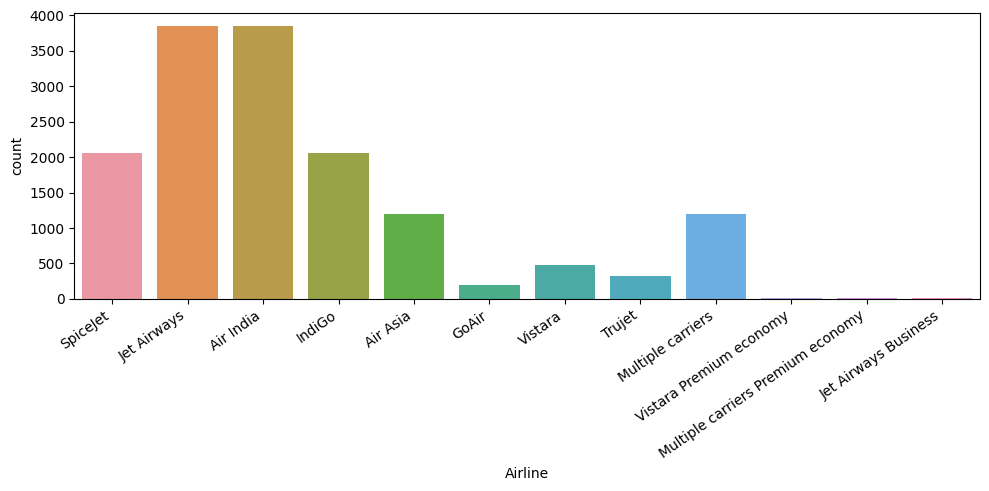

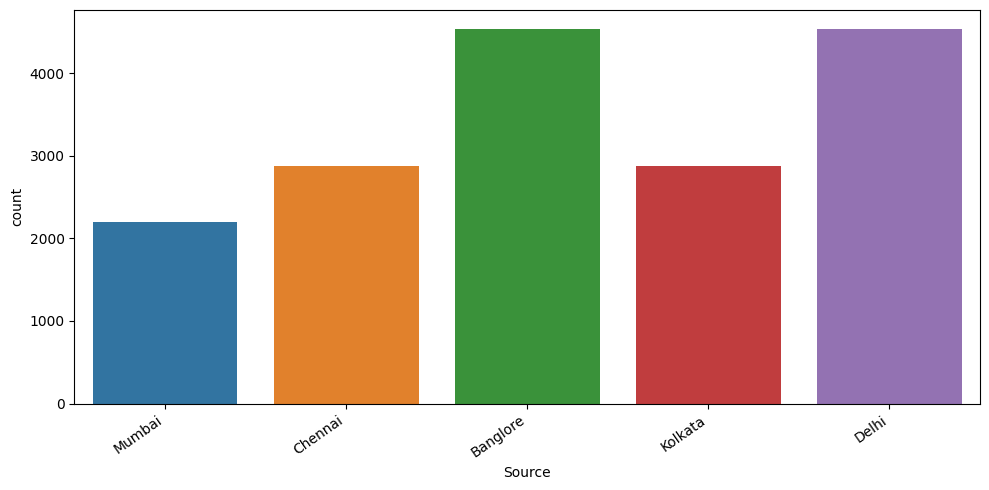

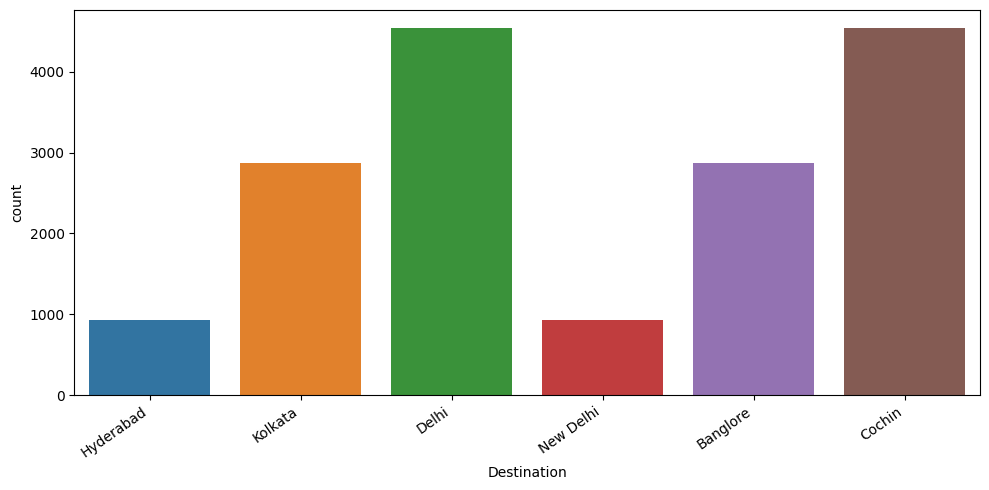

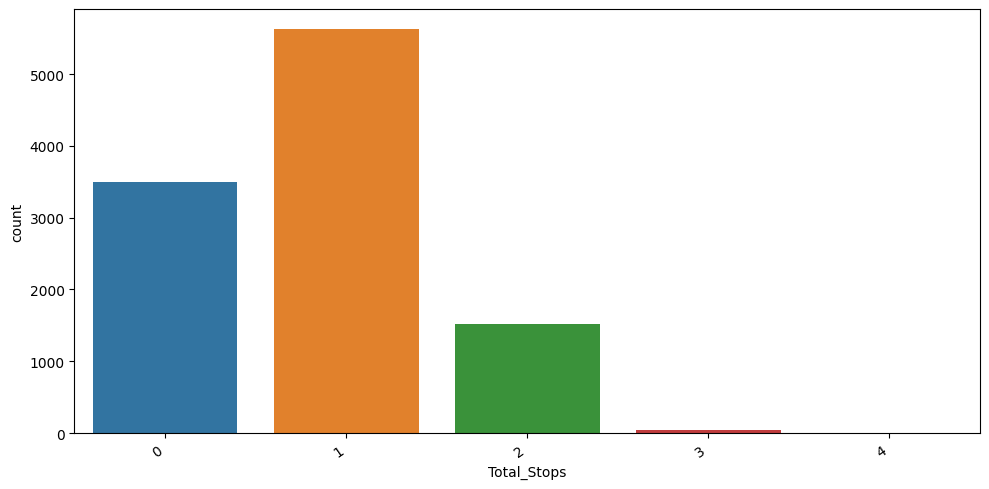

In [653]:
for i in ['Airline', 'Source', 'Destination', 'Total_Stops']:
    plt.figure(figsize = (10, 5))
    sns.countplot(data = data, x = i)
    ax = sns.countplot(x = i, data = data.sort_values('Price', ascending = True))
    #counts of occurrences for each category remain the same; only the order of the categories on the x-axis changes based on the sorted column.

    ax.set_xticklabels(ax.get_xticklabels(), rotation = 35, ha = 'right') #creating a canvas
    plt.tight_layout()
    plt.show()
    print('\n\n\n')

#count = no. of passengers

##**6. AIRLINE**

In [654]:
data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

###**6.1. Identifying Outliers in Ticket Prices**
>**6.1.1.** Airline is object datatype, we need to convert it into numerical format

>**6.1.2.** We will use **Encoding**
>>• Encoding is the process of converting data from one format to another.
• In the context of machine learning, encoding is often used to convert categorical variables (text-based or non-numeric) into a numerical format.
Common encoding methods include label encoding, where each category is assigned a unique numeric label, and one-hot encoding.

>**6.1.3. One-Hot Encoding**
>> A specific type of encoding used for categorical variables. In one-hot encoding, each unique category is represented as a binary vector (a series of 0s and 1s). For each category, a new binary column is created, and the presence of the category is indicated with a 1, while the absence is indicated with a 0.

This approach ensures that the model does not interpret numerical labels as ordinal values and avoids introducing unintended relationships between categories.

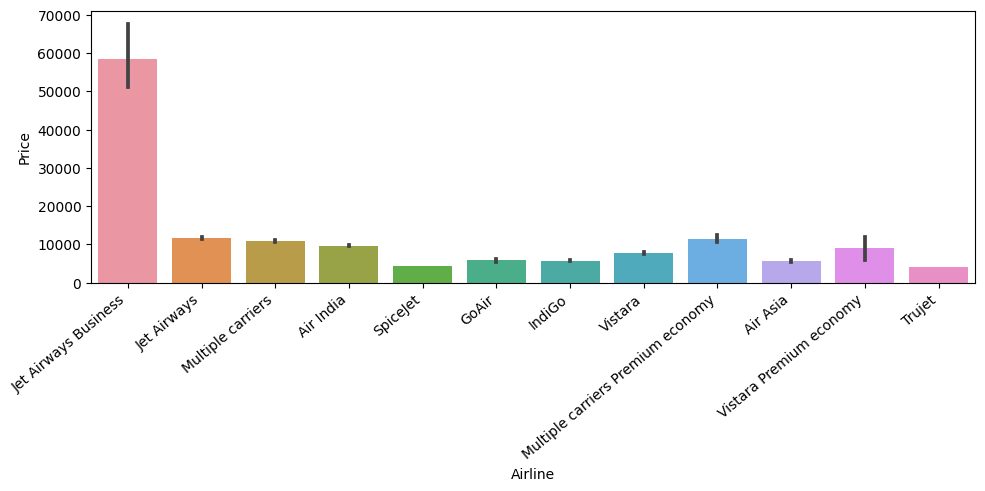

In [655]:
plt.figure(figsize = (10, 5))
ax = sns.barplot(x = 'Airline', y = 'Price', data = data.sort_values('Price', ascending = False))
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = 'right')
plt.tight_layout()
plt.show()

In [656]:
#airline becomes the new index
data.groupby('Airline').describe()['Price'].sort_values('mean', ascending = False)

,count,mean,std,min,25%,50%,75%,max
Airline,,,,,,,,
Jet Airways Business,6.0,58358.666667,11667.596748,46490.0,52243.0,54747.0,61122.50,79512.0
Jet Airways,3849.0,11643.923357,4258.940578,1840.0,9134.0,11467.0,14151.00,54826.0
Multiple carriers Premium economy,13.0,11418.846154,1717.153936,9845.0,10161.0,11269.0,11269.00,14629.0
Multiple carriers,1196.0,10902.678094,3721.234997,5797.0,7723.0,10197.0,13587.00,36983.0
Air India,1751.0,9612.427756,3901.734561,2050.0,6891.0,9443.0,12219.00,31945.0
Vistara Premium economy,3.0,8962.333333,2915.405518,5969.0,7547.0,9125.0,10459.00,11793.0
Vistara,479.0,7796.348643,2914.298578,3687.0,5403.0,7980.0,9345.00,21730.0
GoAir,194.0,5861.056701,2703.585767,3398.0,3898.0,5135.0,6811.25,22794.0
IndiGo,2053.0,5673.682903,2264.142168,2227.0,4226.0,5000.0,6494.00,22153.0


In [657]:
Airline = pd.get_dummies(data['Airline'], drop_first = True)  # get_dummies funcition used for one-hot encoding
Airline.head() #If drop_first is set to True, it removes the first category in each categorical variable. It is to avoid the "dummy variable trap"

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [658]:
# Concating Airline dataframe with the main Data dataframe
data = pd.concat([data, Airline], axis = 1)
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,...,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,0,3897,22,20,1,...,0,1,0,0,0,0,0,0,0,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,7662,5,50,13,...,0,0,0,0,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,13882,9,25,4,...,0,0,1,0,0,0,0,0,0,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1,6218,18,5,23,...,0,1,0,0,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1,13302,16,50,21,...,0,1,0,0,0,0,0,0,0,0


In [659]:
#Getting rid of Airline Column
data.drop('Airline', axis = 1, inplace = True)

##**7. SOURCE AND DESTINATION**
Similar to 'Airlines' using one-hot encoding

In [660]:
list1 = ['Source', 'Destination']
for i in list1:
  print(data[[i]].value_counts(), '\n')

Source  
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
dtype: int64 

Destination
Cochin         4536
Banglore       2871
Delhi          1265
New Delhi       932
Hyderabad       697
Kolkata         381
dtype: int64 



In [661]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Source                             10682 non-null  object
 1   Destination                        10682 non-null  object
 2   Route                              10682 non-null  object
 3   Duration                           10682 non-null  int64 
 4   Total_Stops                        10682 non-null  int64 
 5   Price                              10682 non-null  int64 
 6   Dep_Time_in_hours                  10682 non-null  int64 
 7   Dep_Time_in_minutes                10682 non-null  int64 
 8   Arrival_Time_in_hours              10682 non-null  int64 
 9   Arrival_Time_in_minutes            10682 non-null  int64 
 10  Day_of_Journey                     10682 non-null  int64 
 11  Month_of_Journey                   10682 non-null  int64 
 12  Air 

In [662]:
data = pd.get_dummies(data = data, columns = list1, drop_first = True) #Using one-hot encoding
#For "Airline", I stored one-hat encoded values into 'Airline', then concatinated 'Airline' with 'data', and then finally dropped the original 'Airline' column.
#Whereas, here, I directly injected one-hat encoded values into data, which automatically deleted the original list1 columns

##**8. ROUTE**
>**8.1** The route consists of a special character '→'

>**8.2** Using "Label Encoding"
>>A method of converting categorical data into numerical format. Each unique category or label is assigned a unique integer, typically starting from 0. This encoding is useful for machine learning algorithms that require numerical input, such as decision trees and support vector machines.

**Note**

When the encoded integers imply an ordinal relationship that doesn't exist in the original data, one-hot encoding is often preferred.

In [663]:
route = data[['Route']]
route.head()

,Route
0,BLR → DEL
1,CCU → IXR → BBI → BLR
2,DEL → LKO → BOM → COK
3,CCU → NAG → BLR
4,BLR → NAG → DEL


In [664]:
route['Route_1'] = route['Route'].str.split('→').str[0] #str.split('→') returns a list of splits, and when I use .str[] indexing, I'm accessing elements within each split.
route['Route_2'] = route['Route'].str.split('→').str[1]
route['Route_3'] = route['Route'].str.split('→').str[2]
route['Route_4'] = route['Route'].str.split('→').str[3]
route['Route_5'] = route['Route'].str.split('→').str[4]
# NOTE : false positive warning "SettingWithCopyWarning"
route.head()

<ipython-input-664-dc403d322660>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route['Route_1'] = route['Route'].str.split('→').str[0] #str.split('→') returns a list of splits, and when I use .str[] indexing, I'm accessing elements within each split.
<ipython-input-664-dc403d322660>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route['Route_2'] = route['Route'].str.split('→').str[1]
<ipython-input-664-dc403d322660>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

,Route,Route_1,Route_2,Route_3,Route_4,Route_5
0,BLR → DEL,BLR,DEL,NaN,NaN,NaN
1,CCU → IXR → BBI → BLR,CCU,IXR,BBI,BLR,NaN
2,DEL → LKO → BOM → COK,DEL,LKO,BOM,COK,NaN
3,CCU → NAG → BLR,CCU,NAG,BLR,NaN,NaN
4,BLR → NAG → DEL,BLR,NAG,DEL,NaN,NaN


In [665]:
#replacing "NaN" with "None" for accurate meaning
route.fillna('None', inplace = True)
route.head()

<ipython-input-665-884f7df92220>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route.fillna('None', inplace = True)


,Route,Route_1,Route_2,Route_3,Route_4,Route_5
0,BLR → DEL,BLR,DEL,None,None,None
1,CCU → IXR → BBI → BLR,CCU,IXR,BBI,BLR,None
2,DEL → LKO → BOM → COK,DEL,LKO,BOM,COK,None
3,CCU → NAG → BLR,CCU,NAG,BLR,None,None
4,BLR → NAG → DEL,BLR,NAG,DEL,None,None


In [666]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in range(1, 6):
    col = 'Route_' + str(i)
    route[col] = le.fit_transform(route[col])

route.head()

<ipython-input-666-7e323219adaa>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route[col] = le.fit_transform(route[col])
<ipython-input-666-7e323219adaa>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route[col] = le.fit_transform(route[col])
<ipython-input-666-7e323219adaa>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

,Route,Route_1,Route_2,Route_3,Route_4,Route_5
0,BLR → DEL,0,13,29,13,5
1,CCU → IXR → BBI → BLR,2,25,1,3,5
2,DEL → LKO → BOM → COK,3,32,4,5,5
3,CCU → NAG → BLR,2,34,3,13,5
4,BLR → NAG → DEL,0,34,8,13,5


In [667]:
#concatenating necessary route data and dropping the original "object" type route column
route.drop('Route', axis = 1, inplace = True)
data = pd.concat([data, route], axis = 1)
data.drop('Route', axis = 1, inplace = True)

data.head()

<ipython-input-667-8bb2d1a03bf6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route.drop('Route', axis = 1, inplace = True)


,Duration,Total_Stops,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes,Day_of_Journey,Month_of_Journey,Air India,...,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Route_1,Route_2,Route_3,Route_4,Route_5
0,170,0,3897,22,20,1,10,24,3,0,...,0,0,0,0,1,0,13,29,13,5
1,445,2,7662,5,50,13,15,5,1,1,...,0,0,0,0,0,2,25,1,3,5
2,1140,2,13882,9,25,4,25,6,9,0,...,1,0,0,0,0,3,32,4,5,5
3,325,1,6218,18,5,23,30,5,12,0,...,0,0,0,0,0,2,34,3,13,5
4,285,1,13302,16,50,21,35,3,1,0,...,0,0,0,0,1,0,34,8,13,5


#***The Data Transformation Stage is a wrap!***

We've successfully transformed all the categorical features into numerical formats, making them ready for the machine's perusal! 🚀

.

.

.  

.

#**BUILDING THE MACHINE LEARNING MODELS & EVALUATING THEM**
###**1. Linear Regression**
###**2. Random Forest**


In [668]:
data.head()

,Duration,Total_Stops,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes,Day_of_Journey,Month_of_Journey,Air India,...,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Route_1,Route_2,Route_3,Route_4,Route_5
0,170,0,3897,22,20,1,10,24,3,0,...,0,0,0,0,1,0,13,29,13,5
1,445,2,7662,5,50,13,15,5,1,1,...,0,0,0,0,0,2,25,1,3,5
2,1140,2,13882,9,25,4,25,6,9,0,...,1,0,0,0,0,3,32,4,5,5
3,325,1,6218,18,5,23,30,5,12,0,...,0,0,0,0,0,2,34,3,13,5
4,285,1,13302,16,50,21,35,3,1,0,...,0,0,0,0,1,0,34,8,13,5


In [669]:
#Since 'Price' is my target column I want it to be at the rightmost end of the table.
temp_col = data.columns.to_list()

new_col = temp_col[:2] + temp_col[3:]
new_col.append(temp_col[2])

data = data.reindex(columns=new_col)
data.head()

,Duration,Total_Stops,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes,Day_of_Journey,Month_of_Journey,Air India,GoAir,...,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Route_1,Route_2,Route_3,Route_4,Route_5,Price
0,170,0,22,20,1,10,24,3,0,0,...,0,0,0,1,0,13,29,13,5,3897
1,445,2,5,50,13,15,5,1,1,0,...,0,0,0,0,2,25,1,3,5,7662
2,1140,2,9,25,4,25,6,9,0,0,...,0,0,0,0,3,32,4,5,5,13882
3,325,1,18,5,23,30,5,12,0,0,...,0,0,0,0,2,34,3,13,5,6218
4,285,1,16,50,21,35,3,1,0,0,...,0,0,0,1,0,34,8,13,5,13302


In [670]:
#For normalizing the data (refer to my google doc)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data = scaler.fit_transform(data)

data[0]

array([-0.93149778, -1.22066609,  1.65415376, -0.2349499 , -1.80043628,
       -0.8900139 ,  1.28553644, -0.84844966, -0.44278513, -0.13600489,
        2.05015058, -0.75053033, -0.02370671, -0.35507822, -0.03490678,
       -0.28797191, -0.00967596, -0.21667251, -0.01676082, -0.19231927,
       -0.85909313, -0.60626609, -0.2642058 , -0.85909313, -0.36651266,
       -0.2642058 , -0.19231927,  3.23440464, -1.67418972,  0.13765097,
        1.39512392,  0.40974412,  0.06420744, -1.12553455])

In [671]:
#Splitting the entire dataset into Training and Testing sets, X as feature matrix and y as target variable
from sklearn.model_selection import train_test_split as tts

X = data[:, :-1] #fetching all the rows, and all the colums EXCEPT the last column, i.e. 'Price'.
y = data[:, -1] #fetching all the rows FOR the last column 'Price'

In [672]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.1, random_state=69) #10% data for testing, 90% for training

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9613, 33)
(1069, 33)
(9613,)
(1069,)


---
***X_train:*** Training set of features

***X_test:*** Testing set of features

***y_train:*** Training set of target variable

***y_test:*** Testing set of target variable

***I'm using these sets to train my machine learning model on the training data (X_train, y_train) and evaluate its performance on the testing data (X_test, y_test)***

---

##**1. LINEAR REGRESSION**

In [673]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()  #creating a linear regression instance (object)
model.fit(X_train, y_train)

LinearRegression()

In [674]:
#Evaluation using metrics : RMSE (mean_squared_error) and coefficient determination(or r squared) (r2_score)
from sklearn.metrics import mean_squared_error, r2_score

def metrics(y_true, y_pred):
    print(f'RMSE:', mean_squared_error(y_true, y_pred) ** 0.5)
    print(f'R_Squared value:', r2_score(y_true, y_pred))

def accuracy(y_true, y_pred):
    errors = abs(y_true - y_pred)
    mape = 100 * np.mean(errors/y_true) #mean arithematic percentage error
    accuracy = 100 - mape
    return accuracy

In [675]:
#finding the Machine predicted values on the X_test
y_pred = model.predict(X_test)

In [676]:
metrics(y_test, y_pred)

RMSE: 0.5363849223069886
R_Squared value: 0.64578243585778


In [677]:
accuracy(y_test, y_pred)

70.25168835961027

##**2. RANDOM FOREST REGRESSOR**
It builds a forest of decision trees and combines their predictions to achieve more robust and accurate results.

In [678]:
from sklearn.ensemble import RandomForestRegressor #scikit learn's ensemble module

#creating an instance, the random forest will consist of 500 decision trees, A split will only occur if a node has more than 3 samples.
model_random_forest = RandomForestRegressor(n_estimators = 500, min_samples_split = 3)

model_random_forest.fit(X_train, y_train)

RandomForestRegressor(min_samples_split=3, n_estimators=500)

In [679]:
pred_rf = model_random_forest.predict(X_test)

In [680]:
metrics(y_test, pred_rf)

RMSE: 0.3910661572544223
R_Squared value: 0.8117142567162787


In [681]:
accuracy(y_test, pred_rf)

98.68790547010761